## All Models But Non-PCA

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from PIL import Image

# Dataset directories
base_dir = r"C:\Users\Baki Akgun\OneDrive\Masaüstü\Deep_Learning\fruits-360_dataset_100x100"
train_dir = os.path.join(base_dir, 'Training')
val_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir, 'Test')

# Helper function to load data using PIL
def load_data_pil(data_dir, img_size=(100, 100)):
    images = []
    labels = []
    class_names = os.listdir(data_dir)
    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            img = Image.open(img_path).resize(img_size)
            images.append(np.array(img))
            labels.append(class_name)
    return np.array(images), np.array(labels), class_names


In [2]:
# Load data from all directories (Train, Validation, Test)
train_images_pil, train_labels_pil, class_names_pil = load_data_pil(train_dir, img_size=(100, 100))
val_images_pil, val_labels_pil, _ = load_data_pil(val_dir, img_size=(100, 100))
test_images_pil, test_labels_pil, _ = load_data_pil(test_dir, img_size=(100, 100))

# Flatten the images into 1D vectors
train_images_flat = train_images_pil.reshape(train_images_pil.shape[0], -1)
val_images_flat = val_images_pil.reshape(val_images_pil.shape[0], -1)
test_images_flat = test_images_pil.reshape(test_images_pil.shape[0], -1)

# Normalize the data
scaler = StandardScaler()
train_images_normalized = scaler.fit_transform(train_images_flat)
val_images_normalized = scaler.transform(val_images_flat)
test_images_normalized = scaler.transform(test_images_flat)


In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Performans metriklerini hesaplayan fonksiyon
def evaluate_model(model, X_val, y_val, X_test, y_test):
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_test)

    metrics = {
        "Validation Accuracy": accuracy_score(y_val, val_preds),
        "Validation Precision": precision_score(y_val, val_preds, average='weighted'),
        "Validation Recall": recall_score(y_val, val_preds, average='weighted'),
        "Validation F1 Score": f1_score(y_val, val_preds, average='weighted'),
        "Test Accuracy": accuracy_score(y_test, test_preds),
        "Test Precision": precision_score(y_test, test_preds, average='weighted'),
        "Test Recall": recall_score(y_test, test_preds, average='weighted'),
        "Test F1 Score": f1_score(y_test, test_preds, average='weighted'),
    }
    return metrics


In [5]:
from sklearn.preprocessing import LabelEncoder

# Etiketleri sayısallaştırma
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels_pil)
val_labels_encoded = label_encoder.transform(val_labels_pil)
test_labels_encoded = label_encoder.transform(test_labels_pil)

# Eğitim ve test verilerinin tanımlanması
X_train, y_train = train_images_normalized, train_labels_encoded
X_val, y_val = val_images_normalized, val_labels_encoded
X_test, y_test = test_images_normalized, test_labels_encoded


In [9]:
# Random Forest Modeli
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Performans sonuçları
rf_metrics = evaluate_model(rf_model, X_val, y_val, X_test, y_test)
print("Random Forest Metrics:", rf_metrics)


Random Forest Metrics: {'Validation Accuracy': 1.0, 'Validation Precision': 1.0, 'Validation Recall': 1.0, 'Validation F1 Score': 1.0, 'Test Accuracy': 1.0, 'Test Precision': 1.0, 'Test Recall': 1.0, 'Test F1 Score': 1.0}


In [10]:
# XGBoost Modeli
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Performans sonuçları
xgb_metrics = evaluate_model(xgb_model, X_val, y_val, X_test, y_test)
print("XGBoost Metrics:", xgb_metrics)


XGBoost Metrics: {'Validation Accuracy': 0.9996788696210661, 'Validation Precision': 0.9996809414299624, 'Validation Recall': 0.9996788696210661, 'Validation F1 Score': 0.9996788662358647, 'Test Accuracy': 1.0, 'Test Precision': 1.0, 'Test Recall': 1.0, 'Test F1 Score': 1.0}


In [11]:
# LightGBM Modeli
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Performans sonuçları
lgb_metrics = evaluate_model(lgb_model, X_val, y_val, X_test, y_test)
print("LightGBM Metrics:", lgb_metrics)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 4.666192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5193845
[LightGBM] [Info] Number of data points in the train set: 6231, number of used features: 29935
[LightGBM] [Info] Start training from score -2.984719
[LightGBM] [Info] Start training from score -2.968971
[LightGBM] [Info] Start training from score -2.975241
[LightGBM] [Info] Start training from score -3.007192
[LightGBM] [Info] Start training from score -3.007192
[LightGBM] [Info] Start training from score -2.981550
[LightGBM] [Info] Start training from score -2.968971
[LightGBM] [Info] Start training from score -2.588824
[LightGBM] [Info] Start training from score -2.991089
[LightGBM] [Info] Start training from score -3.003951
[LightGBM] [Info] Start training from score -2.975241
[LightGBM] [Info] Start training from score -3.098937
[LightGBM] [Info] Start training from score -3.033510
[Lig

In [15]:
results_df = pd.DataFrame([
    rf_metrics, xgb_metrics, lgb_metrics, 
], index=["Random Forest", "XGBoost", "LightGBM"])

results_df


,Validation Accuracy,Validation Precision,Validation Recall,Validation F1 Score,Test Accuracy,Test Precision,Test Recall,Test F1 Score
Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
XGBoost,0.999679,0.999681,0.999679,0.999679,1.000000,1.000000,1.000000,1.000000
LightGBM,1.000000,1.000000,1.000000,1.000000,0.999678,0.999681,0.999678,0.999678


In [7]:
from sklearn.svm import SVC

# SVM Modeli
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Performans sonuçları
svm_metrics = evaluate_model(svm_model, X_val, y_val, X_test, y_test)
print("SVM Metrics:", svm_metrics)


SVM Metrics: {'Validation Accuracy': 1.0, 'Validation Precision': 1.0, 'Validation Recall': 1.0, 'Validation F1 Score': 1.0, 'Test Accuracy': 1.0, 'Test Precision': 1.0, 'Test Recall': 1.0, 'Test F1 Score': 1.0}


Iteration 1, loss = 1.31557733
Iteration 2, loss = 0.10213612
Iteration 3, loss = 0.00307991
Iteration 4, loss = 0.00031355
Iteration 5, loss = 0.00022012
Iteration 6, loss = 0.00020316
Iteration 7, loss = 0.00019323
Iteration 8, loss = 0.00018534
Iteration 9, loss = 0.00017966
Iteration 10, loss = 0.00017486
Iteration 11, loss = 0.00017102
Iteration 12, loss = 0.00016753
Iteration 13, loss = 0.00016453
Iteration 14, loss = 0.00016195
Iteration 15, loss = 0.00015954
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
ANN Metrics: {'Validation Accuracy': 1.0, 'Validation Precision': 1.0, 'Validation Recall': 1.0, 'Validation F1 Score': 1.0, 'Test Accuracy': 1.0, 'Test Precision': 1.0, 'Test Recall': 1.0, 'Test F1 Score': 1.0}


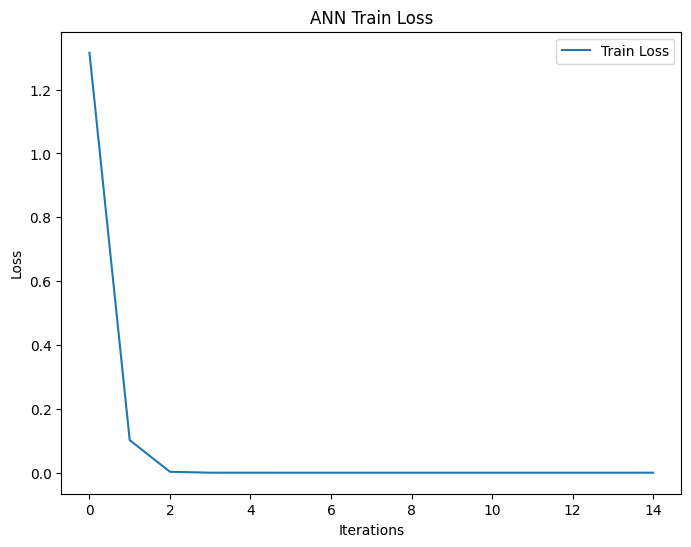

In [12]:
from sklearn.neural_network import MLPClassifier

# ANN Modeli
ann_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=100, random_state=42, verbose=True)
ann_model.fit(X_train, y_train)

# Performans sonuçları
ann_metrics = evaluate_model(ann_model, X_val, y_val, X_test, y_test)
print("ANN Metrics:", ann_metrics)

# MLPClassifier'da loss görselleştirme için `loss_curve_` özelliği kullanılabilir
plt.figure(figsize=(8, 6))
plt.plot(ann_model.loss_curve_, label='Train Loss')
plt.title('ANN Train Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 25s 119ms/step - accuracy: 0.5549 - loss: 1.5480 - val_accuracy: 0.9936 - val_loss: 0.0452
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 0.9944 - loss: 0.0268 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 6.4033e-04
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 1.0000 - loss: 5.8314e-04 - val_accuracy: 1.0000 - val_loss: 4.0585e-04
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 1.0000 - loss: 3.8722e-04 - val_accuracy: 1.0000 - val_loss: 2.8464e-04
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 1.0000 - loss: 2.5351e-04 - val_accuracy: 1.0000 - val_loss: 1.8529e-04
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 1.0000 - loss: 1.8217e-04 - val_accuracy: 1.0000 - val_loss: 1.3081e-04
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 23s 116

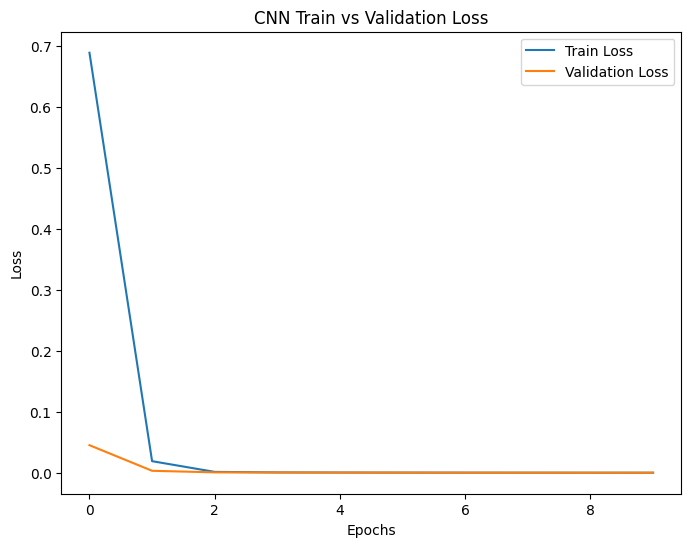

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# CNN için verilerin yeniden şekillendirilmesi ve ölçeklendirilmesi
X_train_cnn = train_images_pil / 255.0
X_val_cnn = val_images_pil / 255.0
X_test_cnn = test_images_pil / 255.0

y_train_cnn = to_categorical(y_train)
y_val_cnn = to_categorical(y_val)
y_test_cnn = to_categorical(y_test)

# CNN Modeli
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(class_names_pil), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğit ve geçmişi kaydet
cnn_history = cnn_model.fit(
    X_train_cnn, y_train_cnn,
    validation_data=(X_val_cnn, y_val_cnn),
    epochs=10, batch_size=32
)

# CNN Performans sonuçlarını hesaplama
def evaluate_cnn_model(model, X_val, y_val, X_test, y_test):
    # Validasyon seti tahminleri
    val_pred = np.argmax(model.predict(X_val), axis=1)
    y_val_true = np.argmax(y_val, axis=1)  # Kategorik veriyi geri çevir
    
    # Test seti tahminleri
    test_pred = np.argmax(model.predict(X_test), axis=1)
    y_test_true = np.argmax(y_test, axis=1)  # Kategorik veriyi geri çevir
    
    # Performans metriklerini hesapla
    metrics = {
        'Validation Accuracy': accuracy_score(y_val_true, val_pred),
        'Validation Precision': precision_score(y_val_true, val_pred, average='weighted'),
        'Validation Recall': recall_score(y_val_true, val_pred, average='weighted'),
        'Validation F1-Score': f1_score(y_val_true, val_pred, average='weighted'),
        'Test Accuracy': accuracy_score(y_test_true, test_pred),
        'Test Precision': precision_score(y_test_true, test_pred, average='weighted'),
        'Test Recall': recall_score(y_test_true, test_pred, average='weighted'),
        'Test F1-Score': f1_score(y_test_true, test_pred, average='weighted')
    }
    return metrics

# CNN metriklerini hesapla
cnn_metrics = evaluate_cnn_model(cnn_model, X_val_cnn, y_val_cnn, X_test_cnn, y_test_cnn)
print("CNN Metrics:", cnn_metrics)

# Eğitim ve doğrulama kayıplarını çiz
plt.figure(figsize=(8, 6))
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [19]:
results_df = pd.DataFrame([
    ann_metrics, cnn_metrics
], index=[  "ANN", "CNN"])

results_df

,Validation Accuracy,Validation Precision,Validation Recall,Validation F1 Score,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Validation F1-Score,Test F1-Score
ANN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
CNN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0
